This notebook uses `PIL`, `pytesseract`, and `pandas` to read image files, convert image to text, and convert text to dataframes.

In [42]:
import os
import re
import pytesseract
from PIL import Image
import pandas as pd
from datetime import datetime

In [174]:
filenames = os.listdir('crossword_images')
# preview filenames
filenames[0:5]

['Screen Shot 2019-12-16 at 8.40.26 PM.png',
 'image (26).png',
 'image (30).png',
 'image (47).png',
 'image (10).png']

In [175]:
filenames[16]

'image (4).png'

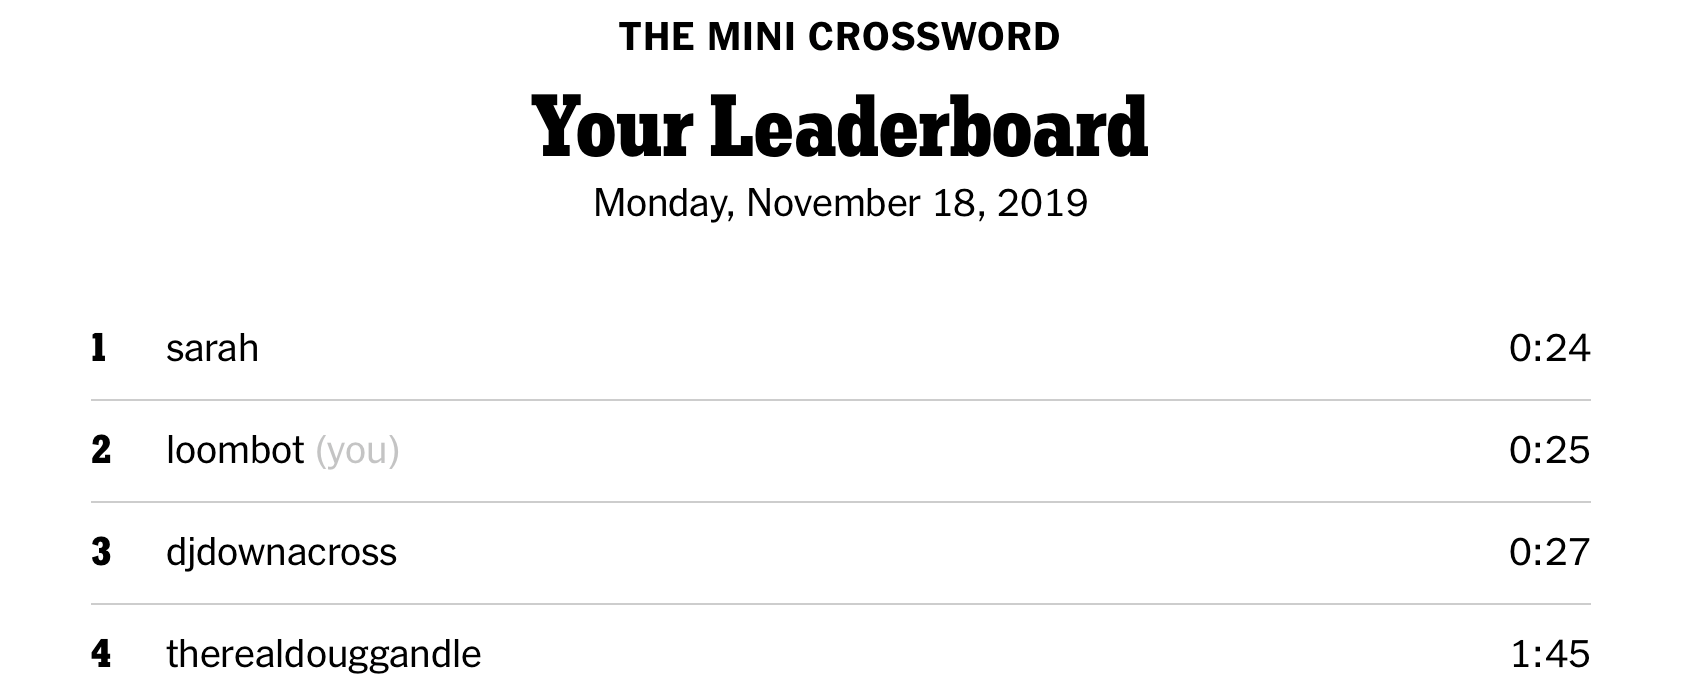

In [191]:
# test it out
image = Image.open('crossword_images/'+filenames[18])
image

In [192]:
text = pytesseract.image_to_string(image)
text

'THE MINI CROSSWORD\n\nYour Leaderboard\n\nMonday, November 18, 2019\n\nsarah\nloombot\ndjdownacross\n\ntherealdouggandle\n\n0:24\n\n0:25\n\n0:27\n\n1:45'

In [193]:
str.splitlines(text)

['THE MINI CROSSWORD',
 '',
 'Your Leaderboard',
 '',
 'Monday, November 18, 2019',
 '',
 'sarah',
 'loombot',
 'djdownacross',
 '',
 'therealdouggandle',
 '',
 '0:24',
 '',
 '0:25',
 '',
 '0:27',
 '',
 '1:45']

In [179]:
# this is not useful
# data = pytesseract.image_to_data(image, output_type= 'data.frame')
# data

In [180]:
text_split = str.splitlines(text)
text_split

['THE MINI CROSSWORD',
 '',
 'Your Leaderboard',
 '',
 'Wednesday, December 18, 2019',
 '',
 'sarah',
 'therealdouggandle',
 'djdownacross',
 'nyc_hat_guy3000',
 '',
 'loombot',
 '',
 '0:15',
 '',
 '0:35',
 '',
 '0:37',
 '',
 '0:39']

In [181]:
text

'THE MINI CROSSWORD\n\nYour Leaderboard\n\nWednesday, December 18, 2019\n\nsarah\ntherealdouggandle\ndjdownacross\nnyc_hat_guy3000\n\nloombot\n\n0:15\n\n0:35\n\n0:37\n\n0:39'

In [265]:
def load_images(filename):
    ''' read in the images '''
    image = Images.open(filename)
    return image


def extract_text(image):
    ''' convert images to text'''
    text = pytesseract.image_to_string(image)
    return(text)

def get_date(text):
    ''' pull out the date in datetime format '''
    # get the date, identified by starting with a day of the week
    p = re.compile('(Monday|Tuesday|Wednesday|Thursday|Friday|Saturday|Sunday)\,\s*([a-zA-Z]*\s[0-9]{1,2}\,\s[0-9]{4})')
    date_string = p.search(text, re.MULTILINE)
    
    # group 2 returns the second parenthesis group in the pattern, ignoring the dow
    date = datetime.strptime(date_string.group(2), "%B %d, %Y") 
    print(date_string) # for verification
    return date

def get_seconds(text):
    ''' pull out the results in seconds as a list'''
    p = re.compile('[0-9]{1,2}:[0-9]{2}')
    results = p.findall(text, re.MULTILINE)
    
#     print (results)
    seconds = []
    for result in results:
        seconds = seconds + [
            (int(str.split(result, ':')[0]) * 60) + 
            int(str.split(result, ':')[1]) 
        ]
    return seconds

def get_players(text):
    ''' pull out the player names as a list'''
    # suppress the header
    p_header = re.compile('.*\\n\\n.*\\n\\n.*\s[0-9]{4}\\n', re.MULTILINE)
    # get player names
    players = p_header.sub(string=text, repl='')
#     p = re.compile('([\w]+)')
#     players = p.findall(text, re.MULTILINE)
    return players
        

In [266]:
get_seconds(text)

[24, 25, 27, 105]

In [267]:
get_players(text)

'\nsarah\nloombot\ndjdownacross\n\ntherealdouggandle\n\n0:24\n\n0:25\n\n0:27\n\n1:45'

In [240]:
text

'THE MINI CROSSWORD\n\nYour Leaderboard\n\nMonday, November 18, 2019\n\nsarah\nloombot\ndjdownacross\n\ntherealdouggandle\n\n0:24\n\n0:25\n\n0:27\n\n1:45'

In [185]:
get_date(text)

<re.Match object; span=(38, 66), match='Wednesday, December 18, 2019'>


datetime.datetime(2019, 12, 18, 0, 0)

In [125]:
get_results(text)